In [1]:
import clustersimpy as cs
import numpy as np

### Creating CLuster

In [2]:
N = 1000
Rmax = 206264 #1pc in AU
q = 0.5 
sigma = 0.1
x = [Rmax,N,q,sigma]
cluster = cs.gen_cluster(x)
cluster.Gen_positions('Fractal',D=0.5)


Mass|parent: 1 1
Mass|parent: 2 2
Mass|parent: 4 4
Mass|parent: 11 11
Mass|parent: 17 17
Mass|parent: 17 17
Mass|parent: 20 20
Mass|parent: 23 23
Mass|parent: 30 30
Mass|parent: 30 30
Mass|parent: 35 35
Mass|parent: 43 43
Mass|parent: 46 46
Mass|parent: 55 55
Mass|parent: 59 59
Mass|parent: 64 64
Mass|parent: 64 64
Mass|parent: 69 69
Mass|parent: 69 69
Mass|parent: 78 78
Mass|parent: 78 78
Mass|parent: 78 78
Mass|parent: 83 83
Mass|parent: 92 92
Mass|parent: 92 92
Mass|parent: 95 95
Mass|parent: 121 121
Mass|parent: 127 127
Mass|parent: 130 130
Mass|parent: 130 130
Mass|parent: 134 134
Mass|parent: 144 144
Mass|parent: 144 144
Mass|parent: 147 147
Mass|parent: 147 147
Mass|parent: 152 152
Mass|parent: 154 154
Mass|parent: 156 156
Mass|parent: 156 156
Mass|parent: 159 159
Mass|parent: 167 167
Mass|parent: 168 168
Mass|parent: 170 170
Mass|parent: 192 192
Mass|parent: 229 229
Mass|parent: 258 258
Mass|parent: 280 280
Mass|parent: 284 284
Mass|parent: 284 284
Mass|parent: 286 286
Mass|par

In [3]:
print(len(cluster.X))
print(len(cluster.Mass))

1003
1003


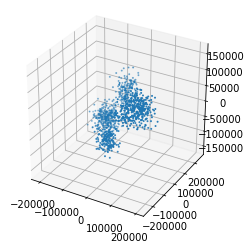

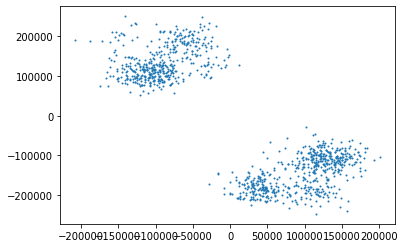

In [4]:
cluster.graph('3D')
cluster.graph('2D')

In [5]:
### Specified Star params
N_star_sys = 1
X_star_sys = cluster.X[N_star_sys]
Y_star_sys = cluster.Y[N_star_sys]
Z_star_sys = cluster.Z[N_star_sys]
Vx_star_sys = cluster.V[N_star_sys][0]
Vy_star_sys = cluster.V[N_star_sys][1]
Vz_star_sys = cluster.V[N_star_sys][2]
M_star = np.array([cluster.Mass[N_star_sys]])

In [6]:
print(M_star)

[0.72330393]


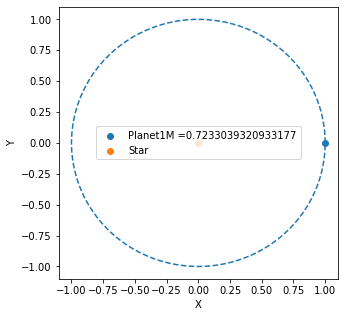

In [7]:
### create specified planet system
theta = np.array([0])
phi = np.array([0])
a = np.array([1])    
e = np.array([0])    #circular
M_planet = np.array([5.9724E-6])

# rotation parameters

theta_1 = 0
phi = 0 
sig = 0

# parameter list
x = [theta,M_planet,M_star,phi,a,e,theta_1,phi,sig]

# Calculating orbit
T = cs.get_planet(x)
T.calculate_params()
T.graph('2D')

In [8]:
## Calcatig planet postions and velocities
X_p = T.R_vec[0,0] + X_star_sys
Y_p = T.R_vec[0,1] + Y_star_sys
Z_p = T.R_vec[0,2] + Z_star_sys

Vx_p = T.V_vec[0,0] + Vx_star_sys
Vy_p = T.V_vec[0,1] + Vy_star_sys
Vz_p = T.V_vec[0,2] + Vz_star_sys

## Adding to the cluster array.

X_cluster = np.hstack((cluster.X,X_p))
Y_cluster = np.hstack((cluster.Y,Y_p))
Z_cluster = np.hstack((cluster.Z,Z_p))
Vx_cluster = np.hstack((cluster.V[0],Vx_p))
Vy_cluster = np.hstack((cluster.V[1],Vy_p))
Vz_cluster = np.hstack((cluster.V[2],Vz_p))

R_vec = np.array([X_cluster,Y_cluster,Z_cluster]).T 

V_vec = np.array([Vx_cluster,Vy_cluster,Vz_cluster]).T 

Mass_cluster = np.hstack((cluster.Mass,M_planet))
print(len(cluster.Mass))

1003


In [9]:
### Write Data.
DAT = cs.data('FC_N=1010_NP=1_at_N=1_RMAX=1PC.dat')
DAT.write(R_vec,V_vec,len(Mass_cluster),0,Mass_cluster)

FC_N=1010_NP=1_at_N=1_RMAX=1PC.dat  sucessfully written to directory!


In [10]:
## C
DAT.read()

N =  1004
time 0.0
units:  1.9884699e+33 3.0856775e+18 31556952.0
mass array [1.55961161e+01 7.23303932e-01 7.28147577e-01 ... 8.51083469e-01
 1.02315447e+00 5.97240000e-06]
FC_N=1010_NP=1_at_N=1_RMAX=1PC.dat  Data Read successfully!
